# 🏠 House Rent Prediction using Linear Regression

This project predicts the **monthly rent price of houses** based on features like bedrooms, bathrooms, area, location rating, etc.  
We will use **Linear Regression** from scikit-learn.


## Import Libraries
We will use the following libraries in this project:

- **pandas** → For loading and handling datasets  
- **numpy** → For numerical operations  
- **matplotlib / seaborn** → For data visualization and analysis  
- **scikit-learn (sklearn)** → For splitting dataset and building the Linear Regression model


In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Load Dataset

In [199]:
# Load dataset
df = pd.read_csv("house_rent_price_dataset.csv")

In [200]:
# Show first 5 rows
df.head()

,bedrooms,bathrooms,area_sqft,balconies,floor,location_rating,age_years,furnishing,parking_spaces,distance_to_city_center_km,rent_price
0,4,2,820,1,17,1,27,0,0,12.954767,45.622632
1,5,2,406,0,13,3,9,0,1,21.128599,51.627563
2,3,3,1948,1,13,4,20,1,2,20.038324,90.343577
3,5,1,2733,2,7,5,7,0,0,10.911332,108.107763
4,5,3,1070,1,9,5,9,1,1,24.428912,75.923274


### Dataset Overview

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   bedrooms                    10000 non-null  int64  
 1   bathrooms                   10000 non-null  int64  
 2   area_sqft                   10000 non-null  int64  
 3   balconies                   10000 non-null  int64  
 4   floor                       10000 non-null  int64  
 5   location_rating             10000 non-null  int64  
 6   age_years                   10000 non-null  int64  
 7   furnishing                  10000 non-null  int64  
 8   parking_spaces              10000 non-null  int64  
 9   distance_to_city_center_km  10000 non-null  float64
 10  rent_price                  10000 non-null  float64
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


### Check Missing Values

In [202]:
df.isnull().sum()

,0
bedrooms,0
bathrooms,0
area_sqft,0
balconies,0
floor,0
location_rating,0
age_years,0
furnishing,0
parking_spaces,0
distance_to_city_center_km,0


In [203]:
df.describe()

,bedrooms,bathrooms,area_sqft,balconies,floor,location_rating,age_years,furnishing,parking_spaces,distance_to_city_center_km,rent_price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,2.990300,2.001500,1710.631300,1.006000,9.91350,3.003800,14.570300,0.507200,0.99990,12.999282,69.175158
std,1.423239,0.814472,751.092547,0.818432,5.44428,1.425899,8.663381,0.499973,0.81189,6.983164,18.401880
min,1.000000,1.000000,400.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.00000,1.002763,14.152918
25%,2.000000,1.000000,1061.000000,0.000000,5.00000,2.000000,7.000000,0.000000,0.00000,6.961897,55.651165
50%,3.000000,2.000000,1719.000000,1.000000,10.00000,3.000000,15.000000,1.000000,1.00000,12.920863,69.210439
75%,4.000000,3.000000,2363.000000,2.000000,15.00000,4.000000,22.000000,1.000000,2.00000,19.163442,82.995797
max,5.000000,3.000000,2998.000000,2.000000,19.00000,5.000000,29.000000,1.000000,2.00000,24.997430,123.999625


### Correlation Heatmap

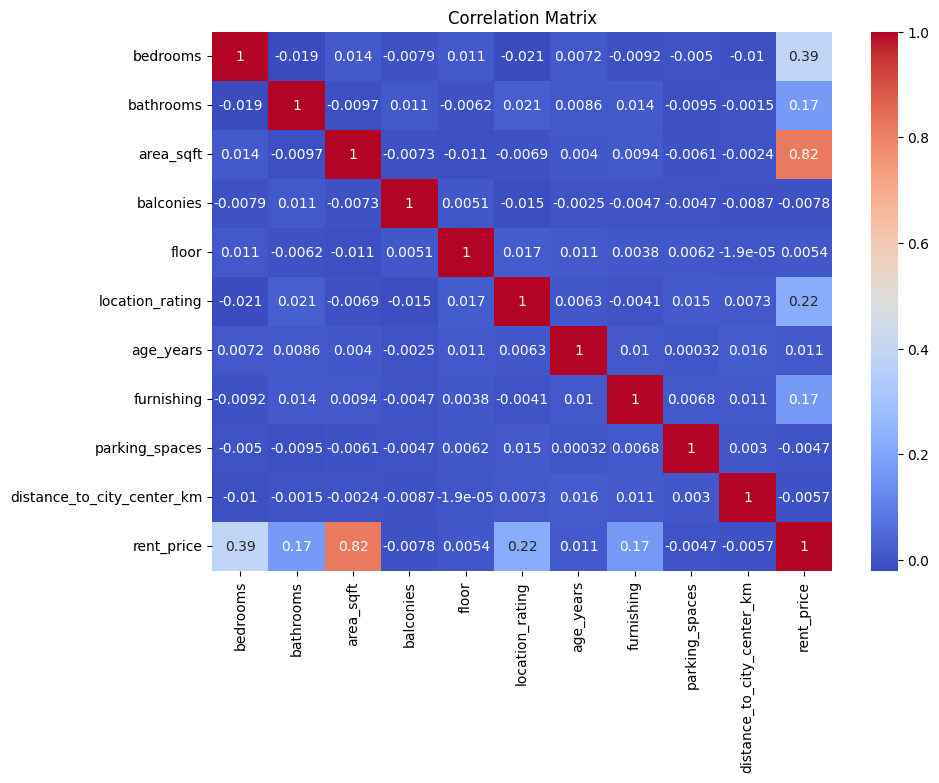

In [204]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Rent Distribution

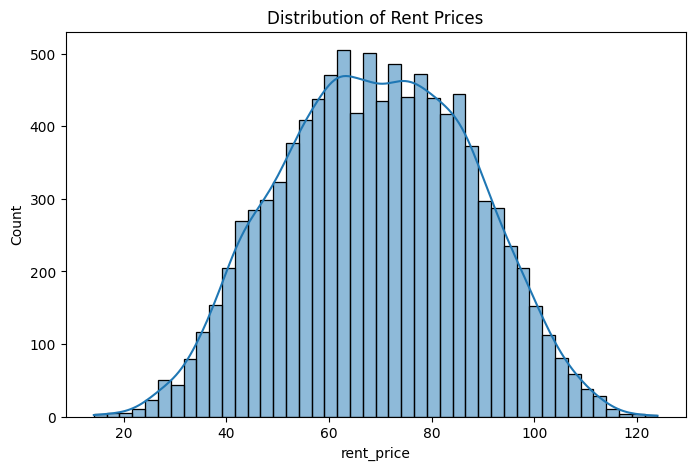

In [205]:
plt.figure(figsize=(8,5))
sns.histplot(df['rent_price'], kde=True)
plt.title("Distribution of Rent Prices")
plt.show()

### Bedrooms vs Rent

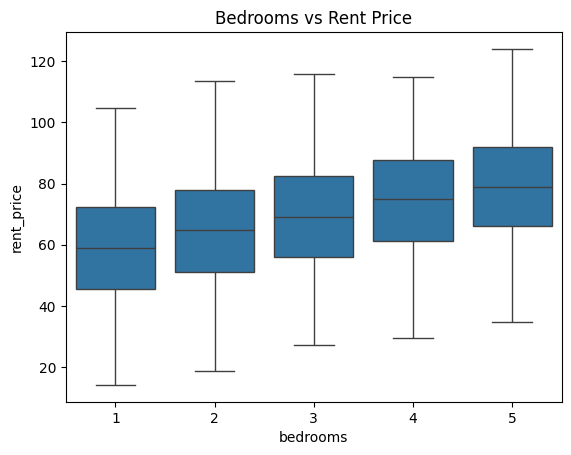

In [206]:
sns.boxplot(x='bedrooms', y='rent_price', data=df)
plt.title("Bedrooms vs Rent Price")
plt.show()

### Define Features (X) and Target (y)
- X → Independent variables (bedrooms, area, location, etc.)  
- y → Dependent variable (rent price)


In [207]:
X = df.drop(columns=["rent_price"])   # Features
y = df["rent_price"]                  # Target

###  Split Data (Train-Test)
We split data into training (80%) and testing (20%).

In [208]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Train Linear Regression Model

In [209]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Make Predictions
Predict rent prices for the full dataset.

In [210]:
df["Predicted_house_price"] = model.predict(X)
df.head()

,bedrooms,bathrooms,area_sqft,balconies,floor,location_rating,age_years,furnishing,parking_spaces,distance_to_city_center_km,rent_price,Predicted_house_price
0,4,2,820,1,17,1,27,0,0,12.954767,45.622632,47.647233
1,5,2,406,0,13,3,9,0,1,21.128599,51.627563,50.120268
2,3,3,1948,1,13,4,20,1,2,20.038324,90.343577,83.994416
3,5,1,2733,2,7,5,7,0,0,10.911332,108.107763,98.600265
4,5,3,1070,1,9,5,9,1,1,24.428912,75.923274,79.455833


### Save Results
Save the dataset with predictions into **CSV** format.


In [211]:
df.to_csv("final_house_rent_predictions.csv", index=False)

print("✅ File saved successfully with predictions!")

✅ File saved successfully with predictions!


In [212]:
from sklearn.metrics import r2_score

# R-squared score calculate karne ke liye
r2 = r2_score(y_test, model.predict(X_test))
print("R-squared Score:", r2)


R-squared Score: 0.9289940693952473
